### IMPORT LIBRARIES

In [1]:
import random
%matplotlib inline
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np
from pylab import plot, show

### GENERATE TEST DATA

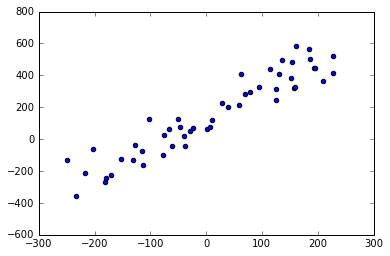

In [2]:
random.seed(300)
beta1 = random.uniform(0, 10)
beta2 = random.uniform(0, 5)
x_pop = range(-250,250,1)
x = random.sample(x_pop,50)
y = [beta1 + beta2*x[i] + random.uniform(0,300) for i in range(len(x))]

#x = [1,6,1.3,76,2,5,6,7,1,7,2,4,6,8,9]
#y = [3,5,2,68,8.9,6,3,5,8,10,3.2,5.11,6,8,4]

plt.scatter(x,y)

### UNIVARIATE REGRESSION FUNCTION

In [3]:
def simple_linear_regression(x,y, p=True):
    """ Perform univariate OLS regression. Return the list [[m, b, r_sq], y-hat] for y-hat=mx+b.
    
    Arguments: x,y are 1D lists of floats, with len(x)==len(y); x[0],y[0] are one data point, etc.
    """   
    
    # verify that (x,y) pairs were provided
    n = len(x)
    if n != len(y):
        print("Sorry, you must provide (x,y) pairs to use this function.")
        return None
    
    # calculate statistics from (x,y) pairs
    def sum_up(x1, x2):
        return x1+x2
    
    mean_y = reduce(sum_up, y)/n
    mean_x = reduce(sum_up, x)/n
    sq_mean_of_x = mean_x**2
    mean_of_x_sq = reduce(sum_up, map(lambda x: x**2, x))/n
    mean_xy = reduce(sum_up, [x[i]*y[i] for i in range(n)])/n
    
    # calculate OLS estimates
    m = (mean_xy - mean_x*mean_y)/(mean_of_x_sq - sq_mean_of_x)
    b = mean_y - m*mean_x
    
    # calculate R squared
    y_hat = [m*xi+b for xi in x]
    RSS = reduce(sum_up, ((y[i]-y_hat[i])**2 for i in range(n)))
    TSS = reduce(sum_up, ((y[i]-mean_y)**2 for i in range(n)))
    r_sq = 1 - (RSS/TSS)
    
    if p:    
        print('y = {}x + {} with R^2 of {}'.format(round(m,4),round(b,4),round(r_sq,4)))
    
    return [[m, b, r_sq],y_hat]  

test_OLS = simple_linear_regression(x,y)

y = 1.7265x + 135.8454 with R^2 of 0.8906


### CHECK AGAINST NUMPY REGRESSION

In [4]:
test_np = np.polyfit(x,y,1)
print '[', test_np[0], '', test_np[1], ']'
print '[', test_OLS[0][0], '', test_OLS[0][1], ']'

[ 1.72472563026  135.383315664 ]
[ 1.72646623361  135.845351601 ]


### VISUALIZE RESULTS

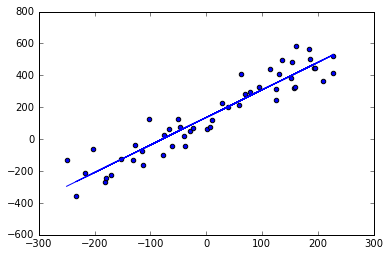

In [5]:
plt.scatter(x,y)
plot(x,test_OLS[1])

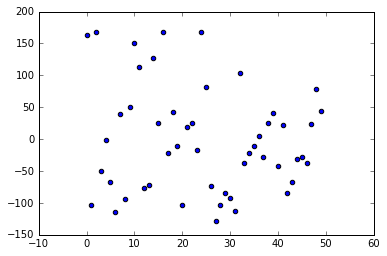

In [6]:
OLS_residuals = [y[i] - test_OLS[1][i] for i in range(len(y))]
plt.scatter(range(len(OLS_residuals)),OLS_residuals)